In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:\\Windows\\Fonts\\malgun.ttf").get_name()
plt.rc("font", family=font_name)
import matplotlib as mlp

mlp.rcParams['axes.unicode_minus']=False

# 아파트매매가격과 출산율 파일

In [2]:
e = pd.read_excel("data/e.xlsx")   # 분기별 아파트 매매 가격 
g = pd.read_csv("data/분기별구별출생아수.csv", encoding="euc-kr")
h = pd.read_csv("data/구별가임여성인원.csv", encoding="euc-kr")
f = pd.read_csv("data/구별합계출산율2021.csv", encoding="euc-kr")
f1 = pd.read_csv("data/구별합계출산율2020.csv", encoding="euc-kr")
f2 = pd.read_csv("data/구별합계출산율2019.csv", encoding="euc-kr")
f3 = pd.read_csv("data/구별합계출산율2018.csv", encoding="euc-kr")
f4 = pd.read_csv("data/구별합계출산율2017.csv", encoding="euc-kr")
m = pd.read_csv("data/구별합계출산율.csv", encoding="euc-kr")

In [3]:
g1 = g.set_index("구별")

In [4]:
h1 = h.groupby("구별").sum()   # 년도별로 구별 가임여성 총인원

## 분기별 구별 출생아수

In [5]:
cols = []
for i in range(2017,2022):
    for j in range(1,5):
        cols.append(f"{str(i)}_{str(j)}")
        
df_quarterly = pd.DataFrame(columns=cols)

for i in range(0, len(g1.columns), 3):
    quarter_sum = g1.iloc[:, i:i+3].sum(axis=1)
#     print(quarter_sum)
#     print(f"{(2017+(i//12))}_{((i//3))%4+1}")
    df_quarterly.loc[:,f"{(2017+(i//12))}_{((i//3))%4+1}"] = quarter_sum
    
print(df_quarterly)
# df_quarterly2 = df_quarterly
# ?pd.merge
# for k in range(len(df_quarterly2.columns)):
#     df2 = pd.merge(df_quarterly2.iloc[:,k], df_quarterly.iloc[:,k], on=df_quarterly2.index)
#     df2.columns = ["구별","x","y"]
#     df2.set_index("구별", inplace=True)
#     print(df2)
#     sns.lmplot(x="x", y="y",data=df2)
#     plt.show()

      2017_1  2017_2  2017_3  2017_4  2018_1  2018_2  2018_3  2018_4  2019_1  \
구별                                                                             
종로구      173     168     177     171     172     150     157     165     167   
중구       239     217     165     187     181     189     189     174     216   
용산구      392     353     376     343     369     360     332     316     352   
성동구      667     612     632     551     633     566     599     548     586   
광진구      690     574     569     514     599     544     574     480     563   
동대문구     602     499     523     493     488     448     519     431     480   
중랑구      739     723     653     629     658     613     595     580     631   
성북구      739     636     693     563     622     557     541     544     562   
강북구      493     480     424     375     378     346     327     293     366   
도봉구      535     476     466     429     427     427     426     427     371   
노원구      963     839     899     793    

## 분기별 구별 합계출산율 구하기

In [6]:
years = [y for y in range(2017,2022)]
qs = [q for q in range(1,5)]

In [7]:
for year in years:
    for q in qs:
        df_quarterly[f"{year}_{q}_birth_rate"] = df_quarterly[f"{year}_{q}"]/(h1[str(year)]/1000*35)
        
print(df_quarterly.iloc[:,-4:].sum(axis=1))
# print(df_quarterly.iloc[:,20:])

구별
종로구     0.456617
중구      0.623106
용산구     0.657611
성동구     0.751815
광진구     0.476297
동대문구    0.560536
중랑구     0.607634
성북구     0.525009
강북구     0.450922
도봉구     0.486899
노원구     0.540316
은평구     0.541609
서대문구    0.530935
마포구     0.554612
양천구     0.506516
강서구     0.596122
구로구     0.699828
금천구     0.556408
영등포구    0.735057
동작구     0.547478
관악구     0.385539
서초구     0.611724
강남구     0.473715
송파구     0.610381
강동구     0.740800
dtype: float64


In [8]:
ten = df_quarterly.iloc[:, -20:]    # 분기별 합계출생율

In [9]:
df_quarterly.iloc[:, -20:]

,2017_1_birth_rate,2017_2_birth_rate,2017_3_birth_rate,2017_4_birth_rate,2018_1_birth_rate,2018_2_birth_rate,2018_3_birth_rate,2018_4_birth_rate,2019_1_birth_rate,2019_2_birth_rate,2019_3_birth_rate,2019_4_birth_rate,2020_1_birth_rate,2020_2_birth_rate,2020_3_birth_rate,2020_4_birth_rate,2021_1_birth_rate,2021_2_birth_rate,2021_3_birth_rate,2021_4_birth_rate
구별,,,,,,,,,,,,,,,,,,,,
종로구,0.135923,0.131995,0.139066,0.134352,0.136455,0.119001,0.124555,0.130901,0.137414,0.137414,0.143997,0.134946,0.123766,0.117030,0.114505,0.090088,0.136639,0.125397,0.100317,0.094264
중구,0.229756,0.208607,0.158618,0.179767,0.174823,0.182550,0.182550,0.168062,0.208572,0.178638,0.175741,0.193122,0.180043,0.166418,0.185883,0.139169,0.166957,0.135155,0.168944,0.152050
용산구,0.202954,0.182762,0.194670,0.177584,0.191056,0.186396,0.171899,0.163614,0.185786,0.178397,0.164674,0.164674,0.164453,0.156696,0.149973,0.137044,0.188117,0.155077,0.163070,0.151346
성동구,0.247213,0.226828,0.234241,0.204219,0.232527,0.207915,0.220037,0.201303,0.223596,0.214820,0.207189,0.190400,0.210414,0.193502,0.191535,0.169511,0.208359,0.192773,0.180058,0.170625
광진구,0.204986,0.170524,0.169039,0.152699,0.180748,0.164152,0.173204,0.144840,0.173772,0.143524,0.152783,0.133956,0.126559,0.117519,0.125624,0.107856,0.126777,0.133838,0.115865,0.099817
동대문구,0.202921,0.168202,0.176292,0.166180,0.166020,0.152412,0.176566,0.146628,0.166234,0.163463,0.164848,0.157922,0.160832,0.149693,0.144471,0.137508,0.146411,0.151362,0.139692,0.123070
중랑구,0.220046,0.215282,0.194438,0.187292,0.203347,0.189440,0.183877,0.179242,0.202046,0.187637,0.167464,0.161381,0.155778,0.153834,0.149624,0.147357,0.158817,0.160815,0.146831,0.141171
성북구,0.188864,0.162541,0.177108,0.143885,0.163385,0.146311,0.142109,0.142897,0.147046,0.146000,0.138150,0.130562,0.149009,0.136350,0.127910,0.125009,0.140255,0.137277,0.131591,0.115886
강북구,0.191575,0.186523,0.164762,0.145721,0.152233,0.139345,0.131693,0.118001,0.153412,0.121556,0.128681,0.110657,0.131196,0.121702,0.106597,0.093218,0.119762,0.118401,0.111143,0.101616


## 분기별 아파트 매매 가격

In [10]:
e.set_index("분기별", inplace=True)
e1 = e.T
e1.index.name="구별"

In [11]:
ys = [(0,4),(4,8),(8,12),(12,16),(16,20)]
li = []

In [12]:
for yy in ys:
    ee = e1.iloc[:, yy[0]:yy[1]].sum(axis=1)
    li.append(ee)

e17, e18, e19, e20, e21 = li

In [13]:
# e17 = e1.iloc[:, 0:4].sum(axis=1)
# e18 = e1.iloc[:, 4:8].sum(axis=1)
# e19 = e1.iloc[:, 8:12].sum(axis=1)
# e20 = e1.iloc[:, 12:16].sum(axis=1)
# e21 = e1.iloc[:, 16:20].sum(axis=1)

In [14]:
e17.columns = "2017"
e17 = pd.DataFrame(e17, columns=["2017"])
e18.columns = "2018"
e18 = pd.DataFrame(e18, columns=["2018"])
e19.columns = "2019"
e19 = pd.DataFrame(e19, columns=["2019"])
e20.columns = "2020"
e20 = pd.DataFrame(e20, columns=["2020"])
e21.columns = "2021"
e21 = pd.DataFrame(e21, columns=["2021"])

##  년별 분기별 구별 합계 출산율

In [15]:
g21 = df_quarterly.iloc[:,-4:].sum(axis=1) # 21년 분기별 구별 합계출산율
g20 = df_quarterly.iloc[:,-8:-4].sum(axis=1) # 20년 분기별 구별 합계출산율
g19 = df_quarterly.iloc[:,-12: -8].sum(axis=1) # 19년 분기별 구별 합계출산율
g18 = df_quarterly.iloc[:,-16: -12].sum(axis=1)  # 18년 분기별 구별 합계출산율
g17 = df_quarterly.iloc[:,-20: -16].sum(axis=1)  # 17년 분기별 구별 합계출산율

In [16]:
g21.columns = "2021"
g21 = pd.DataFrame(g21, columns=["2021"])
g20.columns = "2020"
g20 = pd.DataFrame(g20, columns=["2020"])
g19.columns = "2019"
g19 = pd.DataFrame(g19, columns=["2019"])
g18.columns = "2018"
g18 = pd.DataFrame(g18, columns=["2018"])
g17.columns = "2017"
g17 = pd.DataFrame(g17, columns=["2017"])

##  분기별 아파트 매매 가격과 분기별 구별 합계출산율 Merge

In [17]:
eg17 = pd.merge(e17, g17, on="구별")
eg18 = pd.merge(e18, g18, on="구별")
eg19 = pd.merge(e19, g19, on="구별")
eg20 = pd.merge(e20, g20, on="구별")
eg21 = pd.merge(e21, g21, on="구별")

## 분기별 아파트 매매 가격과 분기별 구별 합계 출산율 그래프

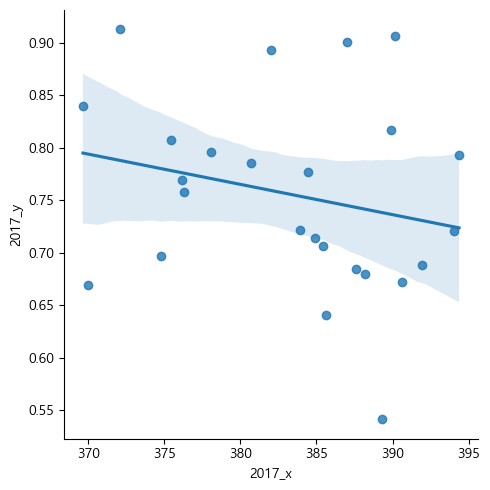

-0.231999141662335

In [18]:
sns.lmplot(x="2017_x", y="2017_y",data=eg17)
plt.show()

np.corrcoef(eg17["2017_x"], eg17["2017_y"])[0,1]

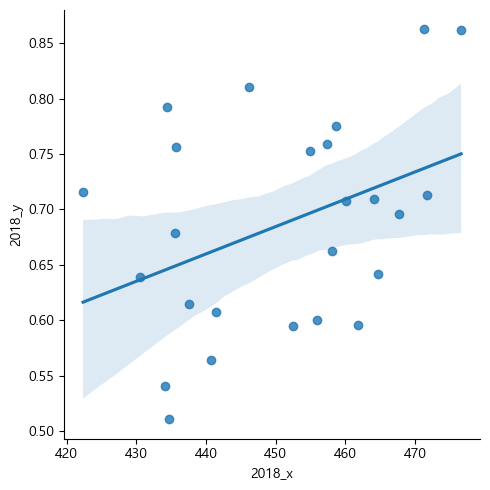

0.3881115141686322

In [19]:
sns.lmplot(x="2018_x", y="2018_y",data=eg18)
plt.show()

np.corrcoef(eg18["2018_x"], eg18["2018_y"])[0,1]

#  T-test, ANOVA, 회귀분석

In [20]:
nine = e1

In [21]:
nine.to_csv("분기별아파트매매가격.csv", index=False)

In [22]:
ten.to_csv("분기별합계출생율.csv", index=False)

In [23]:
test11 = pd.read_csv("data/분기별아파트매매가격과 합계출산율test.csv", encoding="euc-kr")

In [24]:
# ttt = (test11["2017.1/4"] - test11["2017.1/4"].min()) / (test11["2017.1/4"].max() - test11["2017.1/4"].min())
# ttt

In [25]:
test11[0:25]

,구별,구분,2017.1/4,2017.2/4,2017.3/4,2017.4/4,2018.1/4,2018.2/4,2018.3/4,2018.4/4,...,2019.3/4,2019.4/4,2020.1/4,2020.2/4,2020.3/4,2020.4/4,2021.1/4,2021.2/4,2021.3/4,2021.4/4
0,종로구A,1,94.663784,96.102516,98.539817,100.0,103.581443,105.868743,110.814668,114.453200,...,119.906935,123.681326,126.514917,128.241150,135.140287,140.398928,143.678175,150.518791,153.146614,154.589245
1,중구A,1,92.630823,94.223511,97.616031,100.0,105.191593,110.813080,119.490769,124.616115,...,126.929368,131.534203,136.009830,140.579231,145.938453,155.393916,161.262058,164.136798,168.306618,173.927783
2,용산구A,1,88.231529,91.009267,97.027721,100.0,106.967696,115.412414,124.245482,125.109336,...,130.568239,137.582046,140.407154,139.645391,149.242817,155.416580,163.614579,168.351237,183.046676,193.310269
3,성동구A,1,86.498880,90.057671,95.545976,100.0,109.006476,116.757298,123.261579,127.594229,...,130.553488,138.047072,147.028130,151.450813,163.159922,173.624533,184.155336,190.201967,200.224582,203.195766
4,광진구A,1,88.877668,90.756653,95.131987,100.0,107.884080,111.479533,117.683312,121.070700,...,123.570388,133.274832,141.207122,142.421386,153.696200,162.892080,170.549150,176.600174,185.668718,188.317004
5,동대문구A,1,92.946868,94.369203,97.612623,100.0,105.267301,112.199132,120.272793,127.006612,...,127.847847,132.110883,139.765445,145.673471,155.442463,165.440823,175.071971,179.270706,188.133936,185.440268
6,중랑구A,1,94.929046,96.346647,98.650501,100.0,101.872734,104.384214,111.235298,118.200565,...,121.924531,126.265273,132.357851,138.321839,152.433727,162.196577,170.377407,177.966583,190.375521,194.819707
7,성북구A,1,95.538474,96.444650,98.630024,100.0,102.529986,107.828869,115.947260,126.122102,...,124.897801,130.757205,140.082635,148.184403,163.138118,174.810419,181.722136,187.473331,196.206210,198.647656
8,강북구A,1,96.116139,96.921766,98.879538,100.0,100.879219,103.287374,110.421391,119.507097,...,117.606197,119.895529,127.119492,135.494125,148.825245,160.384391,168.099822,173.273770,181.143803,183.705183
9,도봉구A,1,93.071135,95.135955,99.364322,100.0,101.140762,102.506343,108.865415,118.054799,...,118.592357,122.011978,126.519356,130.661632,146.661149,159.933075,174.924652,183.816900,198.633331,198.436350


In [26]:
tfr = test11[25:]

In [27]:
tfr.set_index('구별', inplace=True)

In [28]:
tfr.columns = pd.MultiIndex.from_tuples([tuple(c.split('.')) for c in tfr.columns])

In [29]:
tfr = tfr.stack(level=0).reset_index().rename(columns={'level_1': '연도'})

In [30]:
tfr

,구별,연도,1/4,2/4,3/4,4/4
0,종로구B,2017,0.135923,0.131995,0.139066,0.134352
1,종로구B,2018,0.136455,0.119001,0.124555,0.130901
2,종로구B,2019,0.137414,0.137414,0.143997,0.134946
3,종로구B,2020,0.123766,0.117030,0.114505,0.090088
4,종로구B,2021,0.136639,0.125397,0.100317,0.094264
...,...,...,...,...,...,...
120,강동구B,2017,0.233588,0.204491,0.197965,0.171044
121,강동구B,2018,0.208931,0.191095,0.188547,0.164200
122,강동구B,2019,0.194027,0.167166,0.167452,0.167738
123,강동구B,2020,0.168005,0.167739,0.179152,0.157919


In [31]:
tfr['연도'] = tfr['연도'].astype(int)

In [32]:
tfr1 = tfr.pivot_table(values=['1/4','2/4','3/4','4/4'], index=['연도','구별'])

In [33]:
tfr1.to_csv("분기별합계출산율_final.csv", encoding="euc-kr")

In [34]:
tfr2 = pd.read_csv("분기별합계출산율_final.csv", encoding="euc-kr", index_col=['연도','구별'])

In [35]:
tfr.pivot_table(values=['1/4','2/4','3/4','4/4'], index=['연도','구별'])

1/4       2/4       3/4       4/4
연도   구별                                          
2017 강남구B  0.179979  0.162368  0.168948  0.157530
     강동구B  0.233588  0.204491  0.197965  0.171044
     강북구B  0.191575  0.186523  0.164762  0.145721
     강서구B  0.235845  0.231342  0.227590  0.205825
     관악구B  0.182666  0.167371  0.158849  0.131537
...             ...       ...       ...       ...
2021 용산구B  0.188117  0.155077  0.163070  0.151346
     은평구B  0.148708  0.140098  0.129923  0.122879
     종로구B  0.136639  0.125397  0.100317  0.094264
     중구B   0.166957  0.135155  0.168944  0.152050
     중랑구B  0.158817  0.160815  0.146831  0.141171

[125 rows x 4 columns]

In [36]:
tfr1.rename(columns={'1/4':'1'}, inplace=True)
tfr1.rename(columns={'2/4':'2'}, inplace=True)
tfr1.rename(columns={'3/4':'3'}, inplace=True)
tfr1.rename(columns={'4/4':'4'}, inplace=True)
tfr1

1         2         3         4
연도   구별                                          
2017 강남구B  0.179979  0.162368  0.168948  0.157530
     강동구B  0.233588  0.204491  0.197965  0.171044
     강북구B  0.191575  0.186523  0.164762  0.145721
     강서구B  0.235845  0.231342  0.227590  0.205825
     관악구B  0.182666  0.167371  0.158849  0.131537
...             ...       ...       ...       ...
2021 용산구B  0.188117  0.155077  0.163070  0.151346
     은평구B  0.148708  0.140098  0.129923  0.122879
     종로구B  0.136639  0.125397  0.100317  0.094264
     중구B   0.166957  0.135155  0.168944  0.152050
     중랑구B  0.158817  0.160815  0.146831  0.141171

[125 rows x 4 columns]

# 2012년 ~ 2021년 합계출산율

In [37]:
kfc1 = pd.read_csv("data/시도별_가임여성.csv", encoding="euc-kr")

In [38]:
kbc1 = pd.read_csv("data/시도별_출생아수.csv", encoding="euc-kr")

In [39]:
kfc1

,행정구역.시군구.별.1.,행정구역.시군구.별.2.,시점,합계
0,서울특별시,종로구,2012,43172
1,서울특별시,종로구,2013,41734
2,서울특별시,종로구,2014,40501
3,서울특별시,종로구,2015,39584
4,서울특별시,종로구,2016,38638
...,...,...,...,...
2876,제주특별자치도,서귀포시,2018,37760
2877,제주특별자치도,서귀포시,2019,37426
2878,제주특별자치도,서귀포시,2020,36638
2879,제주특별자치도,서귀포시,2021,36087


In [40]:
kbc1

,시군구별.1.,시군구별.2.,시점,계..명.,분기
0,서울특별시,종로구,2012.01,88,1
1,서울특별시,종로구,2012.02,88,1
2,서울특별시,종로구,2012.03,95,1
3,서울특별시,종로구,2013.01,110,1
4,서울특별시,종로구,2013.02,62,1
...,...,...,...,...,...
34243,제주특별자치도,남제주군,2020.11,0,4
34244,제주특별자치도,남제주군,2020.12,0,4
34245,제주특별자치도,남제주군,2021.10,0,4
34246,제주특별자치도,남제주군,2021.11,0,4


In [41]:
kfc1 = kfc1.rename(columns={'행정구역.시군구.별.1.': '시도별'})
kfc1 = kfc1.rename(columns={'행정구역.시군구.별.2.': '구별'})
kfc1 = kfc1.rename(columns={'시점': '연별'})

In [42]:
kbc1 = kbc1.rename(columns={'시군구별.1.': '시도별'})
kbc1 = kbc1.rename(columns={'시군구별.2.': '구별'})
kbc1 = kbc1.rename(columns={'시점': '연별'})
kbc1 = kbc1.rename(columns={'계..명.': '명수'})


In [43]:
kbc1
kfc1

,시도별,구별,연별,합계
0,서울특별시,종로구,2012,43172
1,서울특별시,종로구,2013,41734
2,서울특별시,종로구,2014,40501
3,서울특별시,종로구,2015,39584
4,서울특별시,종로구,2016,38638
...,...,...,...,...
2876,제주특별자치도,서귀포시,2018,37760
2877,제주특별자치도,서귀포시,2019,37426
2878,제주특별자치도,서귀포시,2020,36638
2879,제주특별자치도,서귀포시,2021,36087


In [44]:
kbc1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34248 entries, 0 to 34247
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시도별     34248 non-null  object 
 1   구별      34248 non-null  object 
 2   연별      34248 non-null  float64
 3   명수      34248 non-null  int64  
 4   분기      34248 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.3+ MB


In [45]:
kbc1["연별"] = kbc1["연별"].astype("str")

In [46]:
kbc1["연별"] = kbc1["연별"].str.split(".").str.get(0)

In [47]:
# print(kbc1.info())
# print(kfc1.info())
kfc1["연별"] = kfc1["연별"].astype("str")

In [48]:
merged_bf = kbc1.merge(kfc1, on=["시도별","구별","연별"])

In [49]:
merged_bf["합계출산율2"] = merged_bf.명수/(merged_bf.합계/1000*35)

In [50]:
merged_bf_test = merged_bf.groupby(["시도별","구별","연별","분기"]).sum()

In [51]:
merged_bf_test.reset_index(inplace=True)

In [52]:
merged_bf_test[(merged_bf_test.시도별 == "서울특별시") & (merged_bf_test.연별 == "2017")]

,시도별,구별,연별,분기,명수,합계,합계출산율2
5948,서울특별시,강남구,2017,1,930,485484,0.164195
5949,서울특별시,강남구,2017,2,839,485484,0.148129
5950,서울특별시,강남구,2017,3,873,485484,0.154132
5951,서울특별시,강남구,2017,4,814,485484,0.143715
5988,서울특별시,강동구,2017,1,859,332553,0.221404
...,...,...,...,...,...,...,...
6871,서울특별시,중구,2017,4,187,91263,0.175631
6908,서울특별시,중랑구,2017,1,739,301131,0.210350
6909,서울특별시,중랑구,2017,2,723,301131,0.205796
6910,서울특별시,중랑구,2017,3,653,301131,0.185871


In [53]:
t_data = pd.read_csv("./data/시군구_출생아수__합계출산율_20230425185920.csv", encoding="euc-kr")
t_data.columns = ["시도별","구별","연별","합계출산율"]

In [54]:
t_data = t_data[t_data.구별 != "소계"]

In [55]:
t_data.loc[t_data.합계출산율 == "-", "합계출산율"] = 0

In [56]:
t_data = t_data[t_data.연별 != "2022 p)"]

In [57]:
t_data.합계출산율 = t_data.합계출산율.astype("float")
t_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2840 entries, 11 to 3309
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시도별     2840 non-null   object 
 1   구별      2840 non-null   object 
 2   연별      2840 non-null   object 
 3   합계출산율   2840 non-null   float64
dtypes: float64(1), object(3)
memory usage: 110.9+ KB


In [89]:
merged_bf_test[merged_bf_test.분기 == 1]

,시도별,구별,연별,분기,명수,합계,합계출산율2
0,강원도,강릉시,2012,1,430,150564,0.244794
4,강원도,강릉시,2013,1,394,148488,0.227435
8,강원도,강릉시,2014,1,345,146133,0.202360
12,강원도,강릉시,2015,1,377,143316,0.225476
16,강원도,강릉시,2016,1,346,140346,0.211314
...,...,...,...,...,...,...,...
10420,충청북도,흥덕구,2017,1,587,403080,0.249649
10424,충청북도,흥덕구,2018,1,572,394416,0.248614
10428,충청북도,흥덕구,2019,1,475,392196,0.207622
10432,충청북도,흥덕구,2020,1,467,394848,0.202754


In [59]:
merged_bf_test2 = merged_bf_test.groupby(["시도별","구별","연별"]).sum()

merged_bf_test2 = merged_bf_test2.merge(t_data, on=["시도별","구별","연별"])
merged_bf_test2[merged_bf_test2.합계출산율 > 0]

,시도별,구별,연별,분기,명수,합계,합계출산율2,합계출산율
0,강원도,강릉시,2012,10,1636,602256,0.931355,1.273
1,강원도,강릉시,2013,10,1460,593952,0.842781,1.173
2,강원도,강릉시,2014,10,1298,584532,0.761342,1.091
3,강원도,강릉시,2015,10,1402,573264,0.838507,1.234
4,강원도,강릉시,2016,10,1236,561384,0.754869,1.137
...,...,...,...,...,...,...,...,...
2631,충청북도,흥덕구,2017,10,2230,1612320,0.948412,1.205
2633,충청북도,흥덕구,2018,10,2043,1577664,0.887967,1.126
2635,충청북도,흥덕구,2019,10,1830,1568784,0.799892,0.993
2637,충청북도,흥덕구,2020,10,1836,1579392,0.797124,0.968


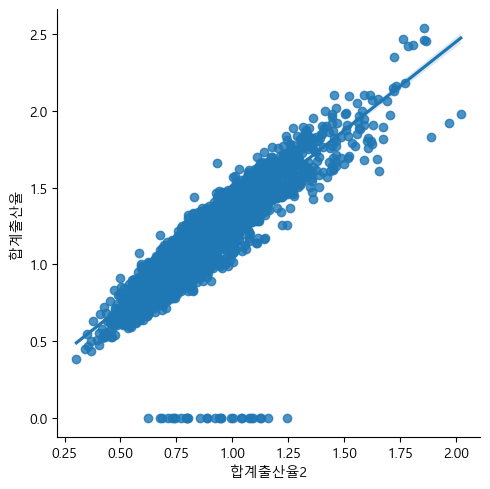

array([[1.       , 0.8537912],
       [0.8537912, 1.       ]])

In [60]:
sns.lmplot(data = merged_bf_test2, x = "합계출산율2", y = "합계출산율")
plt.show()

np.corrcoef(merged_bf_test2.합계출산율2, merged_bf_test2.합계출산율)

In [108]:
mean_bf = merged_bf_test.groupby("분기").mean().합계출산율2
mean_bf = mean_bf.reset_index()
mean_bf.분기 = mean_bf.분기.astype("str")
mean_bf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   분기      4 non-null      object 
 1   합계출산율2  4 non-null      float64
dtypes: float64(1), object(1)
memory usage: 192.0+ bytes


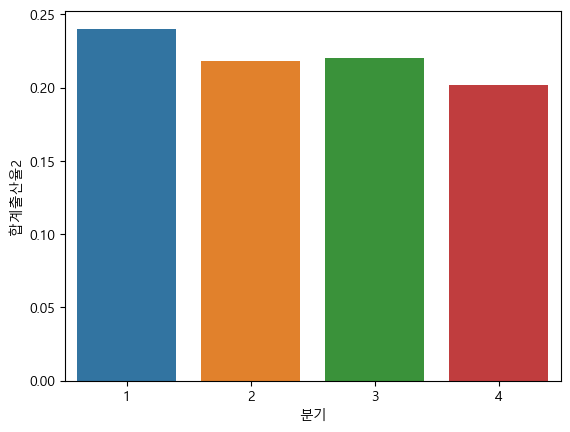

In [112]:
sns.barplot(data=mean_bf, x="분기", y="합계출산율2")
plt.show()

In [126]:
yq = merged_bf_test.groupby(["연별","분기"]).mean()[["합계출산율2"]]

In [133]:
yq = yq.reset_index()

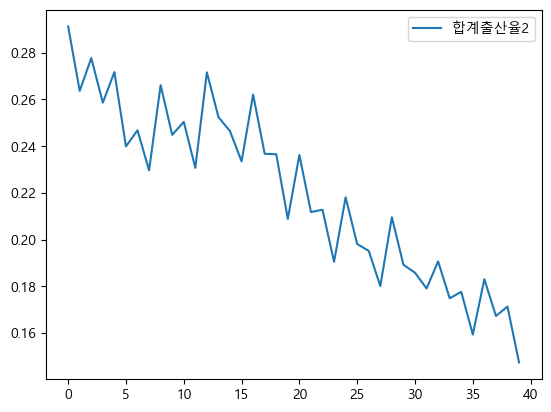

In [141]:
yq[["합계출산율2"]].plot()
plt.show()

In [96]:
merged_bf_test[merged_bf_test.분기 == 1].mean()

C:\Users\acorn\AppData\Local\Temp\ipykernel_10680\3415146801.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  merged_bf_test[merged_bf_test.분기 == 1].mean()


연별                 inf
분기        1.000000e+00
명수        4.540904e+02
합계        1.724958e+05
합계출산율2    2.401715e-01
dtype: float64

In [86]:
merged_bf_test.to_csv("시도별합계출산율_final.csv", index=False, encoding="euc-kr")

In [63]:
merged_bf_test.to_csv("시도별합계출산율_final1.csv", index=True)

In [64]:
merged_bf_test2.to_csv("시도별합계출산율_final2.csv", index=True)

In [65]:
merged_bf_test2.to_csv("시도별합계출산율_final3.csv", index=False)

In [66]:
merged_bf_mean = merged_bf_test.groupby(["시도별","구별","분기"]).mean()

In [67]:
merged_bf_mean.reset_index(inplace=True)

In [68]:
merged_bf_mean1 = merged_bf_mean[merged_bf_mean.분기 == 1]

In [69]:
pop2 = merged_bf_mean

tmp_gu_dict = {'수원':['장안구', '권선구', '팔달구', '영통구'], 
                       '성남':['수정구', '중원구', '분당구'], 
                       '안양':['만안구', '동안구'], 
                       '안산':['상록구', '단원구'], 
                       '고양':['덕양구', '일산동구', '일산서구'], 
                       '용인':['처인구', '기흥구', '수지구'], 
                       '청주':['상당구', '서원구', '흥덕구', '청원구'], 
                       '천안':['동남구', '서북구'], 
                       '전주':['완산구', '덕진구'], 
                       '포항':['남구', '북구'], 
                       '창원':['의창구', '성산구', '진해구', '마산합포구', '마산회원구'], 
                       '부천':['오정구', '원미구', '소사구']}    # 광역시가 아닌 구를 가진 지역

si_name = [None] * len(pop2)
print(si_name)        # 자리만 만들어둔것

[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, Non

In [70]:
merged_bf_mean1.시도별.value_counts()

경기도        52
서울특별시      25
경상북도       25
경상남도       22
전라남도       22
강원도        18
충청남도       17
부산광역시      16
전라북도       16
충청북도       16
인천광역시      11
대구광역시       8
대전광역시       5
울산광역시       5
광주광역시       5
제주특별자치도     2
세종특별자치시     1
Name: 시도별, dtype: int64

In [71]:
for n in pop2.index:
    if pop2["시도별"][n][-3:] not in ["광역시", "특별시", "자치시"]:
        if pop2["구별"][n][:-1] == "고성" and pop2["시도별"][n] == "강원도":
            si_name[n] = "고성(강원)"
        elif pop2["구별"][n][:-1] == "고성" and pop2["시도별"][n] == "경상남도":
            si_name[n] = "고성(경남)"
        else:
            si_name[n] = pop2["구별"][n][:-1]
            
        for keys, values in tmp_gu_dict.items():
            if pop2["구별"][n] in values:
                if len(pop2["구별"][n]) == 2:
                    si_name[n] = keys + " " + pop2["구별"][n]
                elif pop2["구별"][n] in ["마산합포구", "마산회원구"]:
                    si_name[n] = keys + " " + pop2["구별"][n][2:-1]
                else:
                    si_name[n] = keys + " " + pop2["구별"][n][:-1]
    elif pop2["시도별"][n] == "세종특별자치시":
        si_name[n] = "세종"
    else:
        if len(pop2["구별"][n]) == 2:
            si_name[n] = pop2["시도별"][n][:2] + " " + pop2["구별"][n]
        else:
            si_name[n] = pop2["시도별"][n][:2] + " " + pop2["구별"][n][:-1]

In [72]:
si_name

['강릉',
 '강릉',
 '강릉',
 '강릉',
 '고성(강원)',
 '고성(강원)',
 '고성(강원)',
 '고성(강원)',
 '동해',
 '동해',
 '동해',
 '동해',
 '삼척',
 '삼척',
 '삼척',
 '삼척',
 '속초',
 '속초',
 '속초',
 '속초',
 '양구',
 '양구',
 '양구',
 '양구',
 '양양',
 '양양',
 '양양',
 '양양',
 '영월',
 '영월',
 '영월',
 '영월',
 '원주',
 '원주',
 '원주',
 '원주',
 '인제',
 '인제',
 '인제',
 '인제',
 '정선',
 '정선',
 '정선',
 '정선',
 '철원',
 '철원',
 '철원',
 '철원',
 '춘천',
 '춘천',
 '춘천',
 '춘천',
 '태백',
 '태백',
 '태백',
 '태백',
 '평창',
 '평창',
 '평창',
 '평창',
 '홍천',
 '홍천',
 '홍천',
 '홍천',
 '화천',
 '화천',
 '화천',
 '화천',
 '횡성',
 '횡성',
 '횡성',
 '횡성',
 '가평',
 '가평',
 '가평',
 '가평',
 '고양',
 '고양',
 '고양',
 '고양',
 '과천',
 '과천',
 '과천',
 '과천',
 '광명',
 '광명',
 '광명',
 '광명',
 '광주',
 '광주',
 '광주',
 '광주',
 '구리',
 '구리',
 '구리',
 '구리',
 '군포',
 '군포',
 '군포',
 '군포',
 '수원 권선',
 '수원 권선',
 '수원 권선',
 '수원 권선',
 '용인 기흥',
 '용인 기흥',
 '용인 기흥',
 '용인 기흥',
 '김포',
 '김포',
 '김포',
 '김포',
 '남양주',
 '남양주',
 '남양주',
 '남양주',
 '안산 단원',
 '안산 단원',
 '안산 단원',
 '안산 단원',
 '고양 덕양',
 '고양 덕양',
 '고양 덕양',
 '고양 덕양',
 '동두천',
 '동두천',
 '동두천',
 '동두천',
 '안양 동안',
 '안양 동안',
 '안양 동안',
 '

In [73]:
pop2['ID'] = si_name

In [74]:
pop2_1 = pop2[pop2.분기 == 1]

In [75]:
pop2_1

,시도별,구별,분기,명수,합계,합계출산율2,ID
0,강원도,강릉시,1,321.000,138485.7,0.197187,강릉
4,강원도,고성군,1,35.500,14031.3,0.214224,고성(강원)
8,강원도,동해시,1,160.800,58911.0,0.231747,동해
12,강원도,삼척시,1,98.000,40035.0,0.208221,삼척
16,강원도,속초시,1,131.000,54416.4,0.205138,속초
...,...,...,...,...,...,...,...
1044,충청북도,청원구,1,518.625,139465.5,0.318519,청주 청원
1048,충청북도,청원군,1,525.000,105450.0,0.426743,청원
1052,충청북도,청주시,1,1836.500,1223331.0,0.257060,청주
1056,충청북도,충주시,1,354.500,134380.8,0.225026,충주


In [76]:
pop2_1 = pop2_1.set_index("ID")

In [77]:
pop2_2 = pop2[pop2.분기 == 2]
pop2_2 = pop2_2.set_index("ID")
pop2_3 = pop2[pop2.분기 == 3]
pop2_3 = pop2_3.set_index("ID")

pop2_4 = pop2[pop2.분기 == 4]
pop2_4 = pop2_4.set_index("ID")

In [78]:
pop2_2

,시도별,구별,분기,명수,합계,합계출산율2
ID,,,,,,
강릉,강원도,강릉시,2,292.900,138485.7,0.179958
고성(강원),강원도,고성군,2,33.100,14031.3,0.200956
동해,강원도,동해시,2,142.900,58911.0,0.205401
삼척,강원도,삼척시,2,101.000,40035.0,0.216160
속초,강원도,속초시,2,122.600,54416.4,0.191054
...,...,...,...,...,...,...
청주 청원,충청북도,청원구,2,482.875,139465.5,0.296837
청원,충청북도,청원군,2,472.500,105450.0,0.384089
청주,충청북도,청주시,2,1687.000,1223331.0,0.236195


In [84]:
import folium

map = folium.Map(location=[37.5000195,127.0229206], zoom_start=7)

geo_path = "data/skorea_municipalities_geo_simple_update.json"

map.choropleth(geo_data=geo_path, data=pop2_1.합계출산율2,
               key_on="feature.id",
               columns=[pop2_1.index, pop2_1.합계출산율2],
              fill_color="PuRd")
map

In [85]:
import folium

map = folium.Map(location=[37.5000195,127.0229206], zoom_start=7)

geo_path = "data/skorea_municipalities_geo_simple_update.json"

map.choropleth(geo_data=geo_path, data=pop2_2.합계출산율2,
               key_on="feature.id",
               columns=[pop2_2.index, pop2_2.합계출산율2],
              fill_color="PuRd")
map

In [87]:
import folium

map = folium.Map(location=[37.5000195,127.0229206], zoom_start=7)

geo_path = "data/skorea_municipalities_geo_simple_update.json"

map.choropleth(geo_data=geo_path, data=pop2_3.합계출산율2,
               key_on="feature.id",
               columns=[pop2_3.index, pop2_3.합계출산율2],
              fill_color="PuRd")
map

In [88]:
import folium

map = folium.Map(location=[37.5000195,127.0229206], zoom_start=7)

geo_path = "data/skorea_municipalities_geo_simple_update.json"

map.choropleth(geo_data=geo_path, data=pop2_4.합계출산율2,
               key_on="feature.id",
               columns=[pop2_4.index, pop2_4.합계출산율2],
              fill_color="PuRd")
map

In [83]:
kbc = kbc.groupby(["시군구별","시점","분기"]).sum("합계출산율")

NameError: name 'kbc' is not defined

In [ ]:
kbc = kbc.reset_index(["시군구별","시점","분기"])

In [ ]:
kbc["시점"] = pd.to_numeric(kbc["시점"])

In [ ]:
kbc.info()

In [ ]:
kfc.value_counts("시군구별")

In [ ]:
merged_df = pd.merge(kbc, kfc, on=["시군구별","시점"])

In [ ]:
merged_df[merged_df["시점"]==2017]

In [ ]:
merged_df["합계출산율2"] = merged_df.합계출산율/(merged_df.가임여성수/1000*35)

In [ ]:
merged_df = merged_df.groupby(["시군구별","시점"]).sum()

In [ ]:
merged_df[merged_df["시군구별"]=="중구"]

In [ ]:
ktc = pd.read_csv("data/korea_true_cnt.csv", encoding="euc-kr")

In [ ]:
merged_df = pd.merge(merged_df, ktc, on=["시군구별","시점"])

In [ ]:
merged_df.value_counts("시군구별")

In [ ]:
# merged_df = merged_df[merged_df["합계출산율_y"]!="-"]
merged_df["합계출산율_y"] = pd.to_numeric(merged_df["합계출산율_y"])

In [ ]:
sns.lmplot(data=merged_df[merged_df["시군구별"]=="중구"], x="합계출산율2", y="합계출산율_y")
plt.show()

In [ ]:
np.corrcoef(merged_df["합계출산율2"],merged_df["합계출산율_y"])


In [ ]:
# ##### 지도를 이용하여 CCTV 현황 파악
# # https://github.com/southkorea/southkorea-maps

# import folium

# map = folium.Map(location=[37.5000195,127.0229206], zoom_start=10)

# geo_path = "data/seoul/skorea_municipalities_geo_simple_seoul.json"
# map.choropleth(geo_data=geo_path, data=eg18["2018_y"], key_on="feature.id", columns=("2018_x", "2018_y"),
#               fill_color="YlGn")
map

In [ ]:
print(merged_bf_test)

In [ ]:
pd.read_csv("data/.csv", encoding="euc-kr")

In [ ]:
tfr[['연도', '분기']] = pd.DataFrame(list(zip(*tfr.columns.str.split('.', expand=True))))

In [ ]:
year_list = []
sep_list = []

for i in list(zip(tfr.columns.str.split('.', expand=True))):
    year_list.append(i[0][0])
    sep_list.append(i[0][1])

In [ ]:
year_sep = pd.DataFrame({"year":year_list, "sep_list":sep_list})


In [ ]:
tfr[['연도', '분기']] = year_sep

In [ ]:
tfr = tfr.set_index(['연도', '분기'])

In [ ]:
tfr



### 주택가격 오르면 출산율은 떨어진다. [기사]

In [ ]:
import requests 
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [ ]:
url = "https://m.khan.co.kr/economy/real_estate/article/202301022211025#c2b"
html = requests.get(url,headers={"User-Agent":"Mozilla/5.0"})
soup = BeautifulSoup(html.text, "html.parser")

In [ ]:
one = soup.find_all("div", "article_cont")
print(one)